# T-SNE in Python to Visualize High-Dimensional Data Sets"

This notebook is based on [Using T-SNE in Python to Visualize High-Dimensional Data Sets](https://builtin.com/data-science/tsne-python) by Luuk Derksen.

This example is based on [Modified National Institute of Standards and Technology (MNIST) data set](https://en.wikipedia.org/wiki/MNIST_database). 
We can grab it through Scikit-learn, so there’s no need to manually download it.

Each one-digit image consists of 28 x 28 pixels and therefore have a total of 784 dimensions, each holding the value of one specific pixel.

## Make all the neecssary imports

In [1]:
# from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

## Read the Data 

Check the information about [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)

In [2]:
mnist = fetch_openml('mnist_784', as_frame=True)
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
print(type(mnist))
print(type(mnist.data))  # X
print(type(mnist.target))# y

<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


You vam check the information about [`Bunch` objects](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html)

`Bunch` objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, `bunch["value_key"]`, or by an attribute, `bunch.value_key`.

### Check the data that we got

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
mnist.data
# only include the features, i.e. the pixels

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [6]:
mnist.target
# the target digit for each row

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
df = mnist.frame
df
# the dataframe includes the class information

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
2          0.0  ...       0.0       0.0       0.0       0.0       0.0   
3          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  class  
0           0.0       0.0       0.0       0.0      5  
1           0.0       0.0       0.0       0.0      0  
2           0.0       0.0       0.0       0.0      4  
3           0.0       0.0       0.0       0.0      1  
4           0.0       0.0       0.0       0.0      9  
...         ...       ...       ...       ...    ...  
69995       0.0       0.0       0.0       0.0      2  
69996       0.0       0.0       0.0       0.0      3  
69997       0.0       0.0       0.0       0.0      4  
69998       0.0       0.0       0.0       0.0      5  
69999       0.0       0.0       0.0       0.0      6  

[70000 rows x 785 columns]

In [16]:
feature_names = mnist.feature_names
feature_names[0:10]

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10']

## Applying PCA

In [17]:
# Applying PCA with all the rows and features
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feature_names].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [18]:
pca_result.shape

(70000, 3)

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

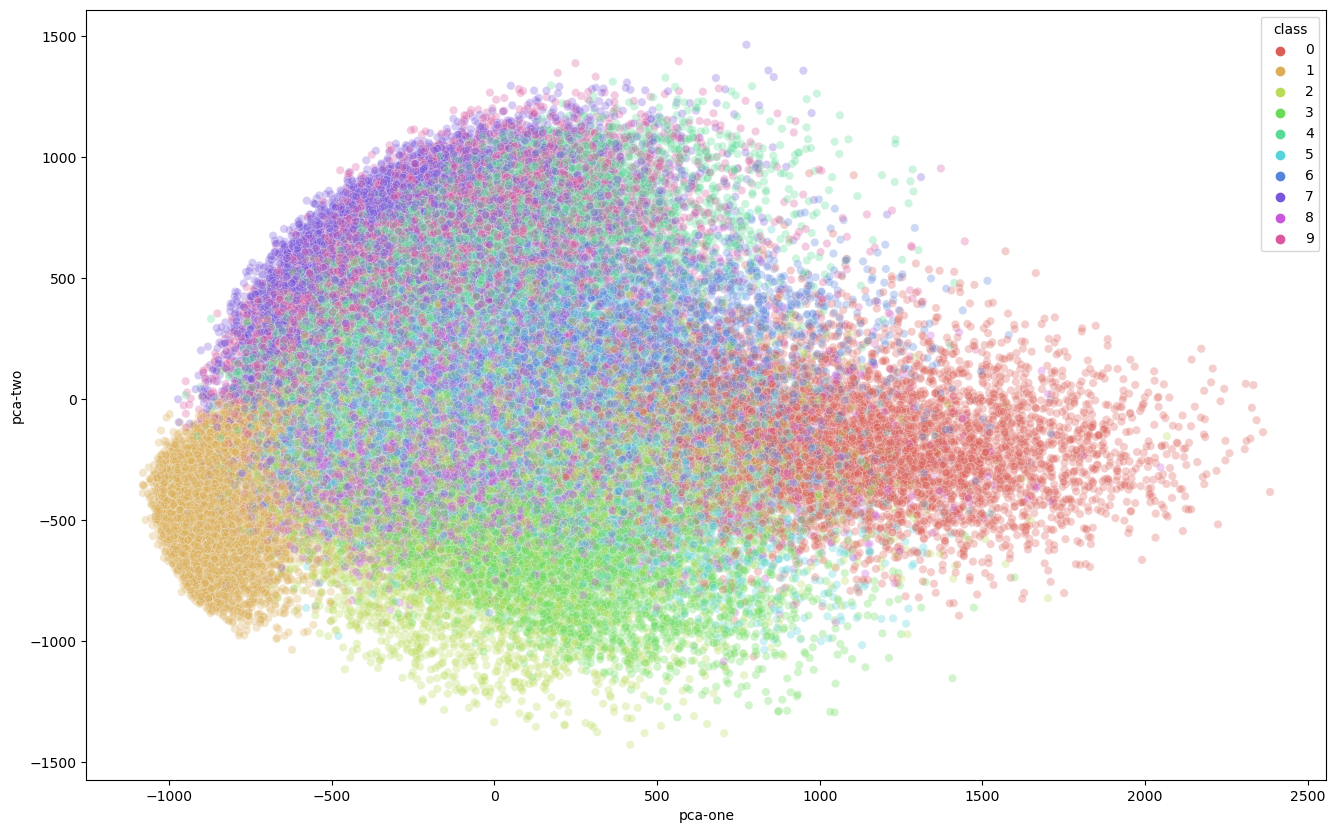

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue=df['class'], 
    palette=sns.color_palette("hls", 10),
    data = df,
    legend="full",
    alpha=0.3
)

## t-SNE visualization

**T-distributed stochastic neighbor embedding (t-SNE)** minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

### Get a smaller sample

We’ll take a random subset of the digits because we don’t want to be using 70,000 digits in our calculations. The randomization is important as the data set is sorted by its label (i.e., the first 7,000 or so are zeros, etc.). 

We’ll create a random permutation of the numbers zero to 69,999 to ensure randomization. This allows us to select the first 5-to-10,000 for our calculations and visualizations.

In [20]:
# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0]) # 70 000

In [25]:
# N is the size of the subset
N = 10000

# Selecting the first N rows after a permutaion
df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[mnist.feature_names].values

In [21]:
rndperm[0:20]

array([46730, 48393, 41416, 34506, 43725, 11615, 24656, 22411,   936,
       56364, 25949, 31524,  4678, 16864,  4230, 65711,  3787, 31386,
       63361,  9900])

### Applying PCA to the subset
We will also run the PCA again on the subset to compare.

In [26]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


### Appling t-SNE using all colunms
Contrary to the general recommendation we will first try to run the algorithm on the actual dimensions of the data (784) and see how it does. We’ll only use the first 10,000 samples to run the algorithm on to make sure we don’t burden our machine in terms of memory and power/time.

In [27]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 1.425s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 540.083306
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.789635
[t-SNE] KL divergence after 300 iterations: 2.801516
t-SNE done! Time elapse

Now that we have the two resulting dimensions, we can create a scatter plot of the two dimensions and color each sample by its respective class to visualize them.

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

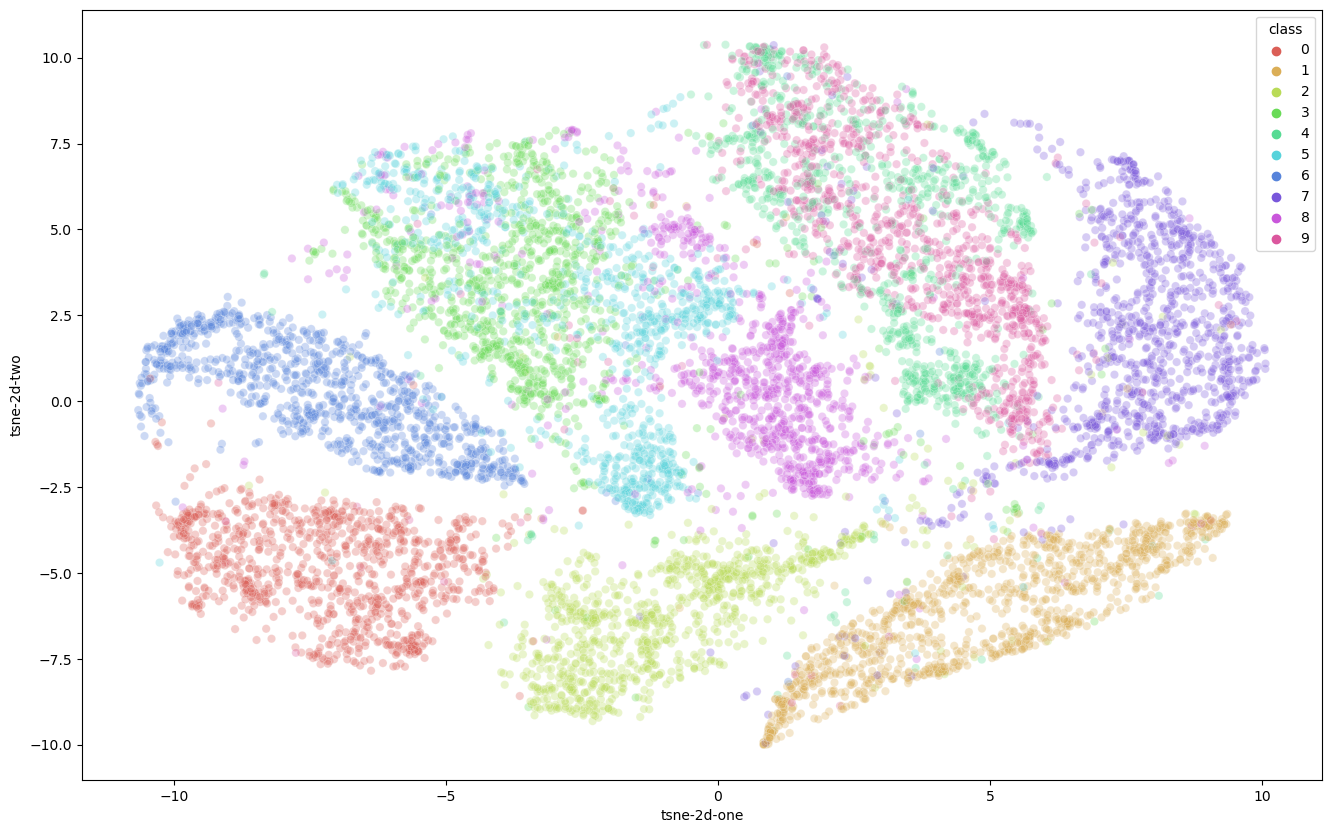

In [28]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df['class'],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

This is already a significant improvement over the PCA visualization we used earlier. We can see that the digits are very clearly clustered in their own sub groups. If we used a clustering algorithm to pick out the separate clusters, we could probably quite accurately assign new points to a label. Just to compare PCA and t-SNE:

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

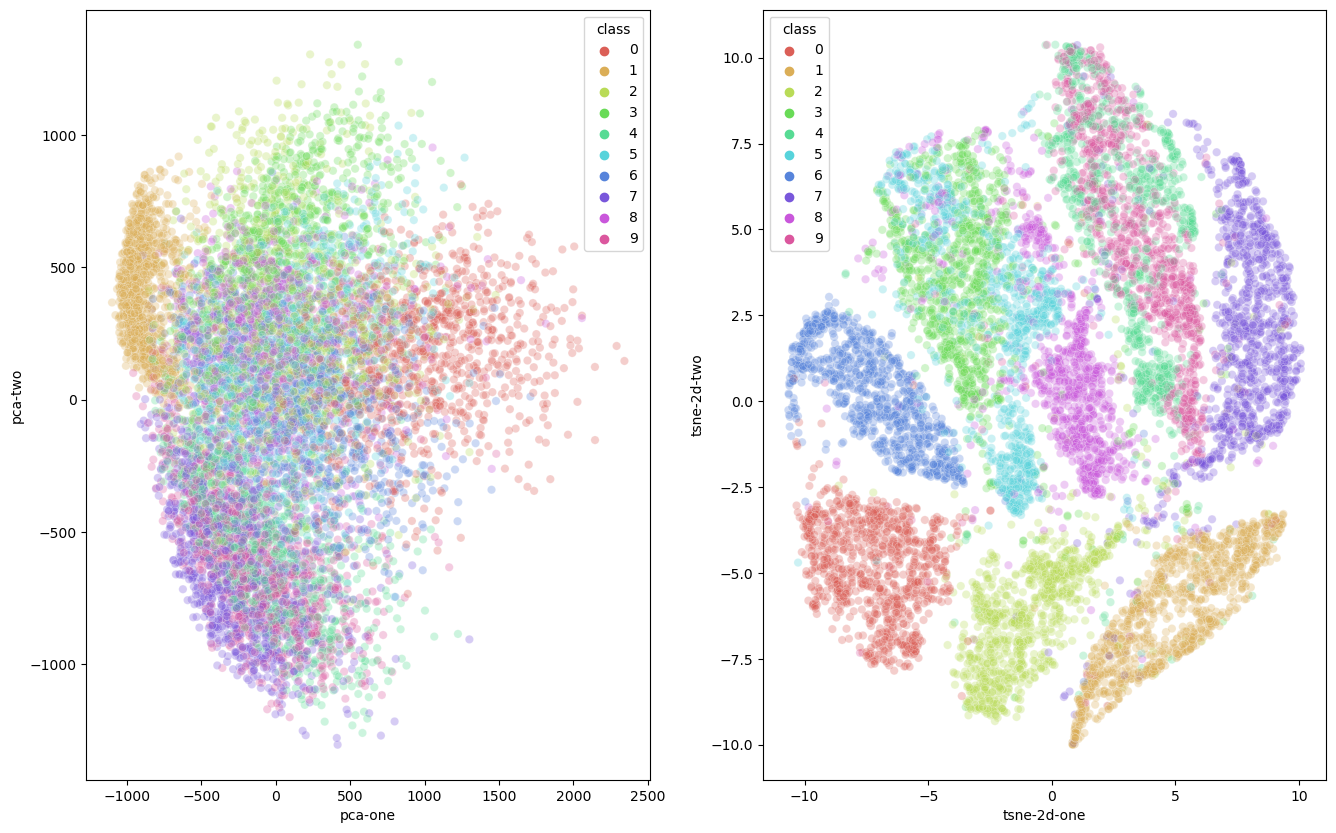

In [30]:
plt.figure(figsize=(16,10))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=df['class'],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df['class'],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### Applying t-SNE using only 50 compoments provided  by PCA

We can now take the recommendations to heart and reduce the number of dimensions before feeding the data into the t-SNE algorithm. We’ll use PCA again for this. We will first create a new data set containing the fifty dimensions generated by the PCA reduction algorithm. Then, we can use this dataset to perform the t-SNE.

In [32]:
# Aplly PCA to get the first 50 components 
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8261561141403231


The first 50 components hold around 83 percent of the total variation in the data

In [33]:
# Now apply T-SNE using the 50 components from PCA
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 6.411844968795776 seconds


Text(0.5, 1.0, 'T-SNE from 50 PCA compoments')

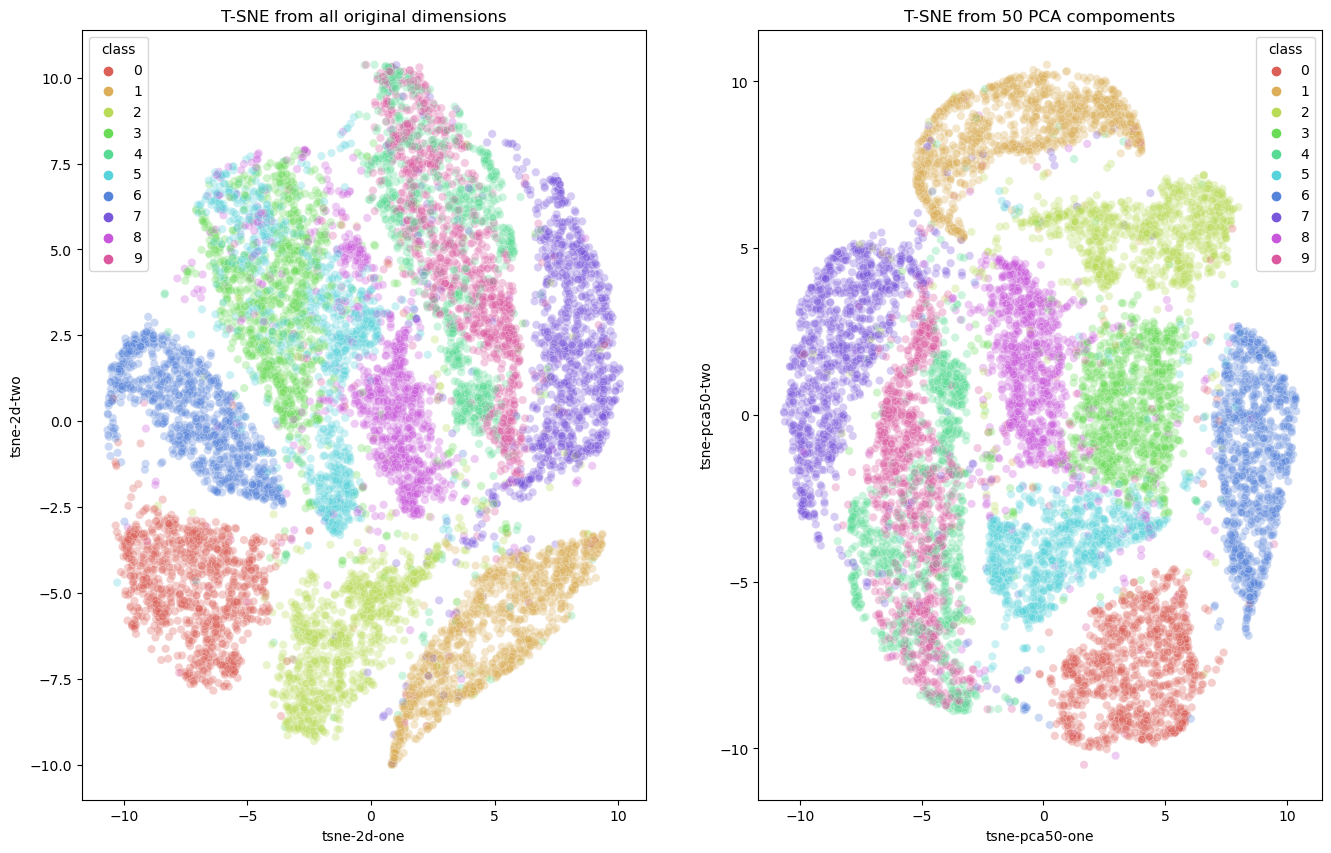

In [40]:
df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))

ax2 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df['class'],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax2.set_title('T-SNE from all original dimensions')

ax3 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue=df['class'],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)
ax3.set_title('T-SNE from 50 PCA compoments')
